In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
from wordcloud import WordCloud
from collections import Counter

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [6]:
import os
print("Module Imported")

Module Imported


In [7]:
data = pd.read_csv("McDonald_s_Reviews.csv", encoding='latin-1')

In [8]:
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [9]:
data=data.drop(['reviewer_id','store_name','store_address','longitude'],axis=1)

In [10]:
data=data[['review','rating']]

In [11]:
data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [12]:
data.isnull().sum()

review    0
rating    0
dtype: int64

In [13]:
data.duplicated().sum()

10774

In [14]:
data=data.drop_duplicates()

In [15]:
data.shape

(22622, 2)

In [16]:
data.rating.value_counts()

1 star     7234
5 stars    6238
4 stars    3656
3 stars    3215
2 stars    2279
Name: rating, dtype: int64

In [17]:
data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [18]:
data.columns=['text','label']

In [19]:
data['text']=data['text'].astype('str')

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
def lowercase(text):
    text=text.lower()
    return text

data['text']=data['text'].apply(lowercase)

In [22]:
def text_clean(text):
    text=re.sub("\[.*#&]"," ",text)
    text=re.sub("https?://\S+|www\.\S+","",text)
    text=re.sub("[^a-zA-Z0-9\s]+","",text)
    text = re.sub('\w*\d\w*', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    text = re.sub('\s+', ' ', text).strip()
    return text

data["text"]=data["text"].apply(text_clean)

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
stemmer = SnowballStemmer('english')
def stem_text(text):
    tokens=nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


data['text'] = data['text'].apply(stem_text)
data.head()

,text,label
0,look like someon spit food normal transact eve...,1 star
1,itd mcdonald far food atmospher go staff make ...,4 stars
2,made mobil order got speaker check line move l...,1 star
3,mc crispi chicken sandwich custom servic quick p,5 stars
4,repeat order time drive thru still manag mess ...,1 star


In [26]:
replacements = {'1 star': 1, '2 stars': 2, '3 stars': 3,'4 stars': 4,'5 stars': 5}
data.replace(replacements, inplace=True)

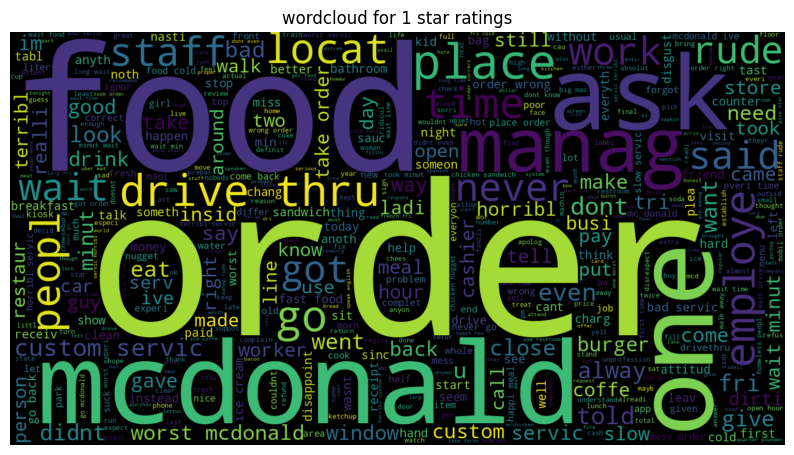

In [27]:
def wordcloud_text(text):

    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('wordcloud for 1 star ratings')
    plt.show()

star_ratings_1= " ".join(data[data['label'] == 1]['text'])
wordcloud_text(star_ratings_1)

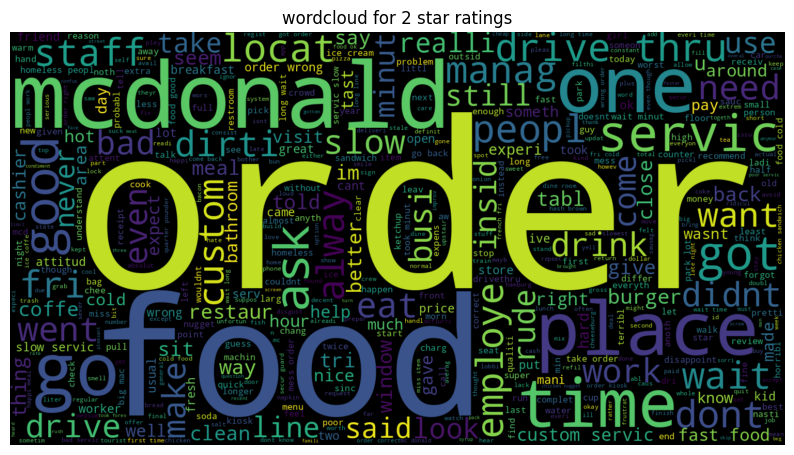

In [28]:
def wordcloud_text(text):

    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('wordcloud for 2 star ratings')
    plt.show()

star_ratings_2= " ".join(data[data['label'] ==2]['text'])
wordcloud_text(star_ratings_2)

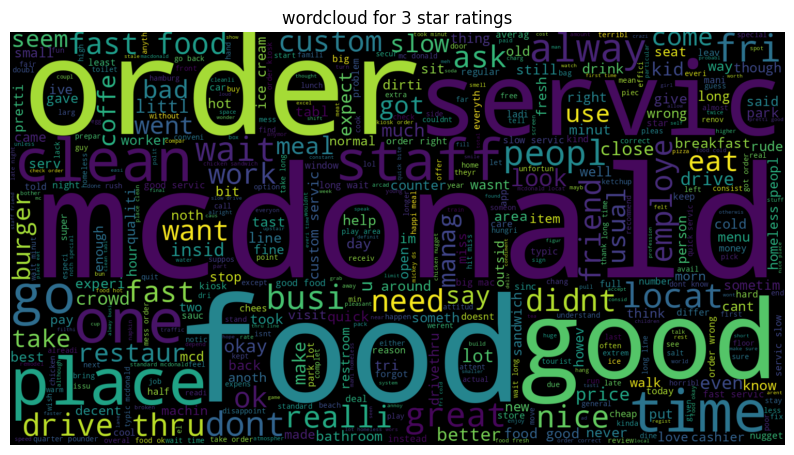

In [29]:
def wordcloud_text(text):

    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('wordcloud for 3 star ratings')
    plt.show()

star_ratings_3= " ".join(data[data['label'] ==3]['text'])
wordcloud_text(star_ratings_3)

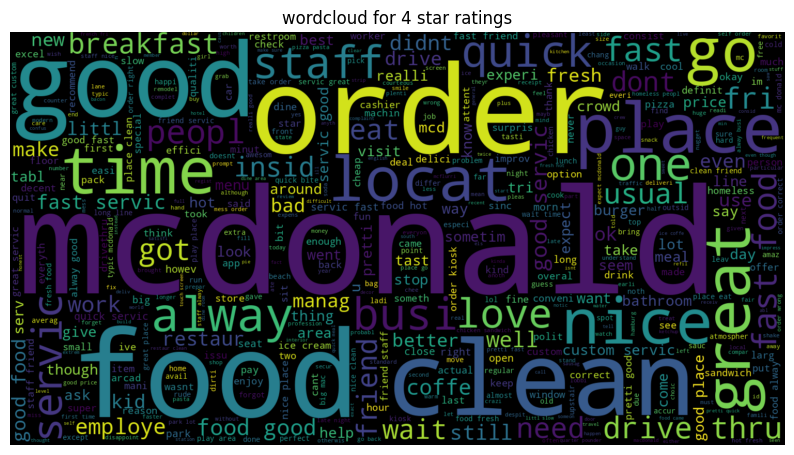

In [30]:
def wordcloud_text(text):

    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('wordcloud for 4 star ratings')
    plt.show()

star_ratings_4= " ".join(data[data['label'] ==4]['text'])
wordcloud_text(star_ratings_4)

<Figure size 1000x500 with 0 Axes>

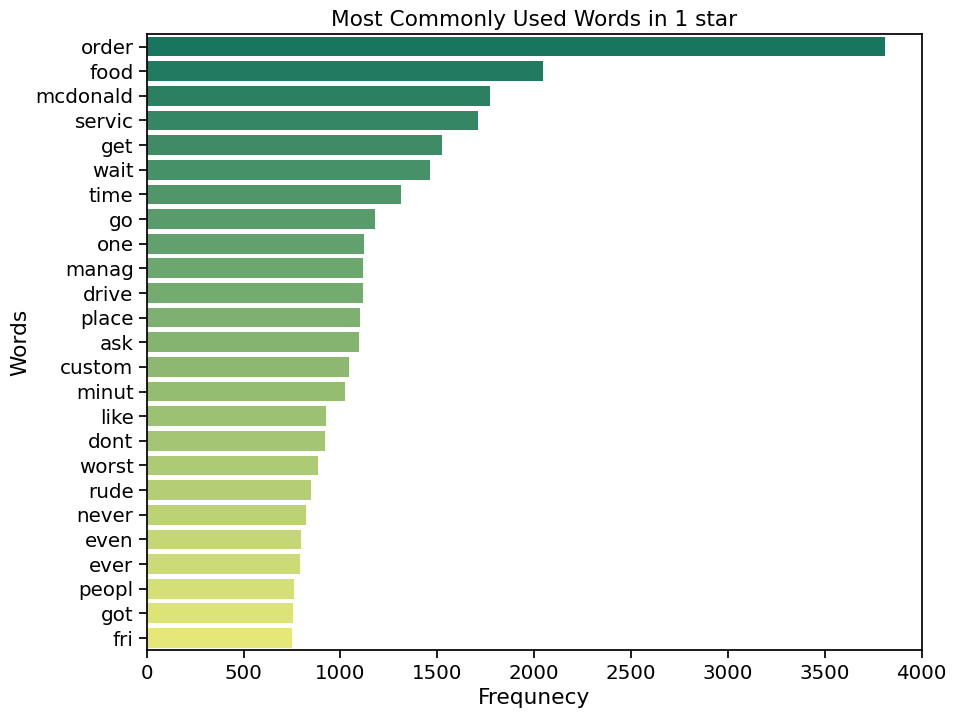

In [31]:
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])
    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 1 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show();
plot_words_freq((star_ratings_1).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

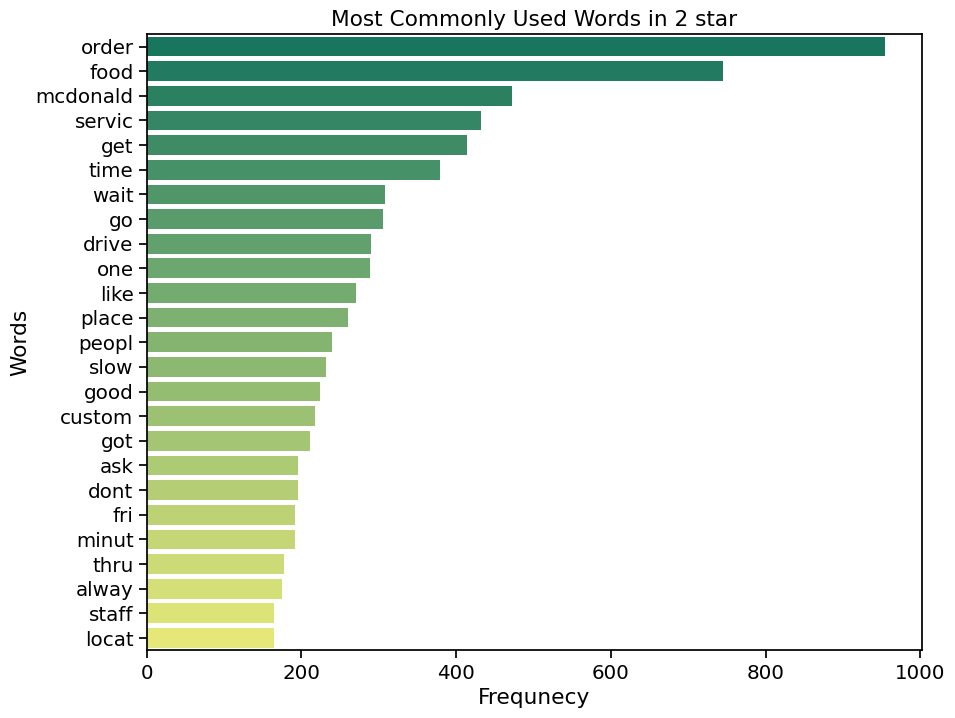

In [32]:
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])
    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 2 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show();
plot_words_freq((star_ratings_2).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

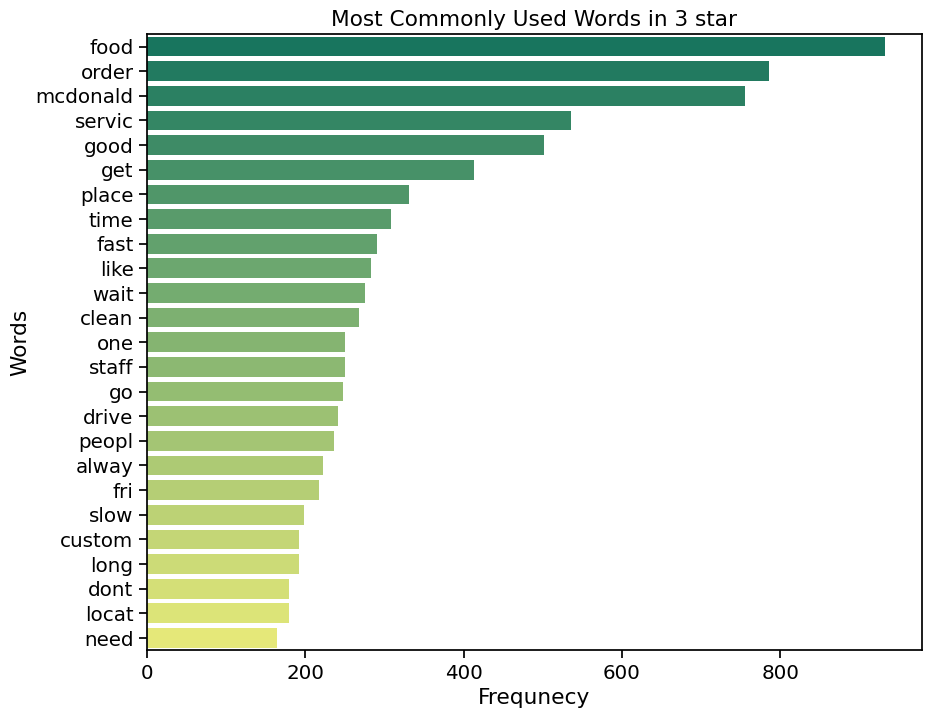

In [33]:
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])
    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 3 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show();
plot_words_freq((star_ratings_3).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

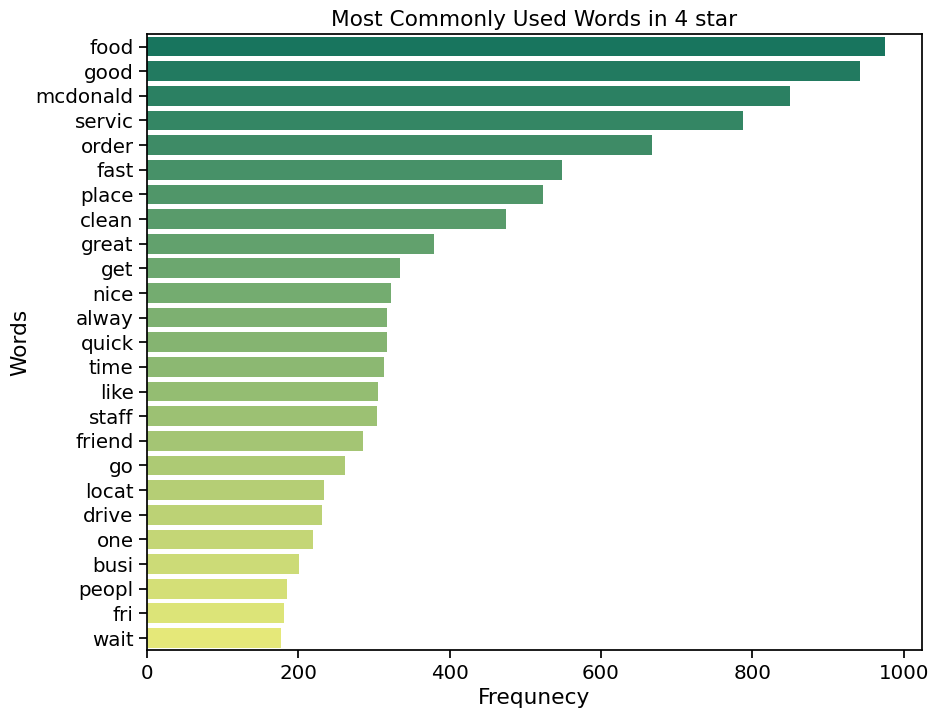

In [34]:
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])
    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 4 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show();
plot_words_freq((star_ratings_4).split());
plt.show()

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB().fit(X_train, y_train)
nb_model.score(X_test,y_test)

0.5356906077348066

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.532596685082873

In [38]:
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(data['text'])
sequences_train = tokenizer.texts_to_sequences(data['text'])
word_index = tokenizer.word_index

In [39]:
data_train = pad_sequences(sequences_train, maxlen = max_len)

In [40]:
model = tf.keras.Sequential()
model.add(Embedding(max_words, 16, input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 160,291
Trainable params: 160,291
Non-trainable params: 0
__________________________________________________

In [41]:
history = model.fit(data_train, data['label'], epochs = 30, batch_size = 64)

Epoch 1/30
354/354 [==============================] - 3s 5ms/step - loss: -45.9678 - accuracy: 0.3198
Epoch 2/30
354/354 [==============================] - 2s 5ms/step - loss: -1290.2804 - accuracy: 0.3198
Epoch 3/30
354/354 [==============================] - 2s 5ms/step - loss: -8233.9531 - accuracy: 0.3198
Epoch 4/30
354/354 [==============================] - 2s 6ms/step - loss: -27967.4082 - accuracy: 0.3198
Epoch 5/30
354/354 [==============================] - 2s 5ms/step - loss: -68477.0312 - accuracy: 0.3198
Epoch 6/30
354/354 [==============================] - 2s 6ms/step - loss: -137928.5312 - accuracy: 0.3198
Epoch 7/30
354/354 [==============================] - 2s 5ms/step - loss: -244264.6250 - accuracy: 0.3198
Epoch 8/30
354/354 [==============================] - 2s 5ms/step - loss: -394735.7188 - accuracy: 0.3198
Epoch 9/30
354/354 [==============================] - 2s 5ms/step - loss: -596909.0625 - accuracy: 0.3198
Epoch 10/30
354/354 [==============================] - 2

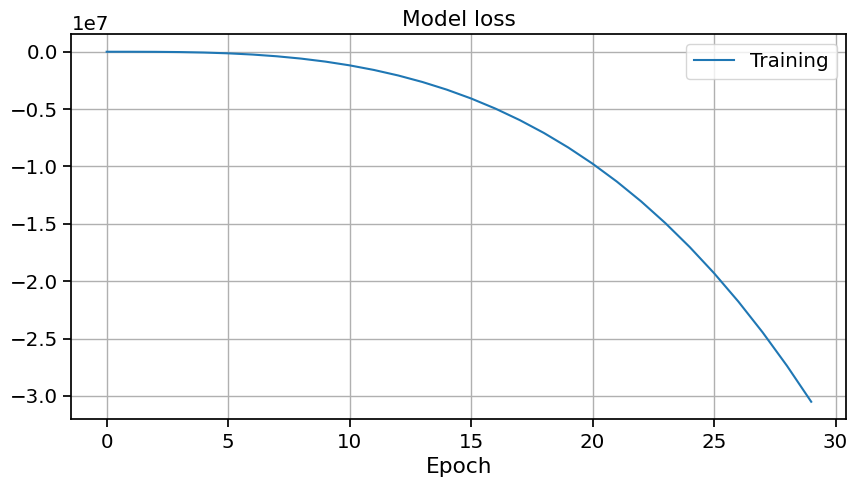

In [42]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.grid()
plt.show()